## 姓名统计(1880-2018)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
names1880 = pd.read_csv('../data/names/yob1880.txt',names=['name','sex','births'])

In [8]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [9]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [11]:
### 按性别分组计算出生人数

In [12]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

## 合并各文件数据

In [14]:
years = range(1880,2019)

In [15]:
pieces = []

In [16]:
columns = ['name','sex','births']

In [18]:
for year in years:
    path = '../data/names/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    frame['year'] = year
    pieces.append(frame)

In [19]:
names = pd.concat(pieces,ignore_index=True)

In [20]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [21]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### 数据透视

In [24]:
total_births = pd.pivot_table(names,index=['year','sex'],values=['births'],aggfunc=sum)

In [29]:
total_births.tail()

births
year sex         
2016 M    1891585
2017 F    1719138
     M    1842837
2018 F    1686961
     M    1800392

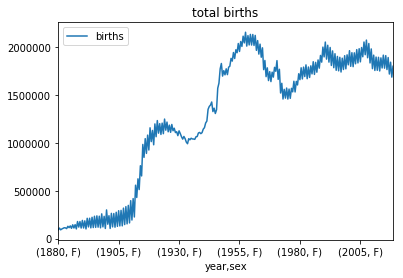

In [32]:
total_births.plot(title='total births')

In [35]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

In [36]:
names = names.groupby(['year','sex']).apply(add_prop)

In [37]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


###  有效性检查

In [ ]:
np.allclose()